In [1]:
#1.1 Install dependencies

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
import tensorflow as tf
import os


In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU') #Pour eviter des erreus et consomation excessive de GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread(os.path.join('dataset_images', 'messenger', '20221117_125310_4.png'))

In [9]:
img.shape

(1152, 1440, 3)

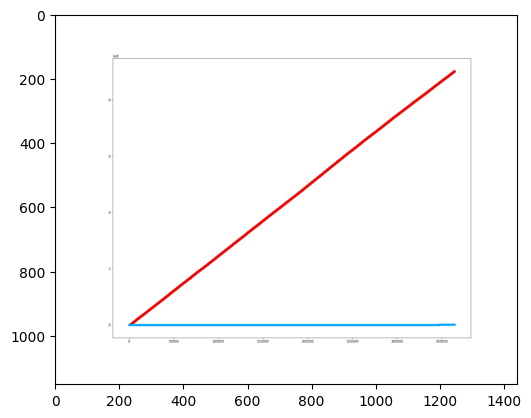

In [10]:
plt.imshow(img)

In [11]:
data_dir = 'dataset_images'

In [12]:
os.listdir(os.path.join(data_dir, 'messenger'))

['20221117_125310_10.png',
 '20221117_125310_11.png',
 '20221117_125310_12.png',
 '20221117_125310_13.png',
 '20221117_125310_14.png',
 '20221117_125310_4.png',
 '20221117_125310_5.png',
 '20221117_125310_6.png',
 '20221117_125310_7.png',
 '20221117_125310_8.png',
 '20221117_125310_9.png',
 '20221124_143112_10.png',
 '20221124_143112_11.png',
 '20221124_143112_12.png',
 '20221124_143112_13.png',
 '20221124_143112_5.png',
 '20221124_143112_6.png',
 '20221124_143112_7.png',
 '20221124_143112_8.png',
 '20221124_143112_9.png',
 '20221124_151137_4.png',
 '20221124_151137_5.png',
 '20221124_151137_6.png',
 '20221124_151137_7.png',
 '20221124_151137_8.png',
 '20221125_130559_15.png',
 '20221125_130559_16.png',
 '20221125_130559_17.png',
 '20221125_130559_18.png',
 '20221125_130559_19.png',
 '20221125_130559_20.png',
 '20221125_130559_21.png',
 '20221125_130559_22.png',
 '20221125_130559_23.png',
 '20221125_130559_24.png',
 '20221125_130559_25.png',
 '20221125_130559_26.png',
 '20221125_130559

In [13]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [14]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [15]:
image_exts[1]

'jpg'

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

20221117_125310_10.png
20221117_125310_11.png
20221117_125310_12.png
20221117_125310_13.png
20221117_125310_14.png
20221117_125310_4.png
20221117_125310_5.png
20221117_125310_6.png
20221117_125310_7.png
20221117_125310_8.png
20221117_125310_9.png
20221124_143112_10.png
20221124_143112_11.png
20221124_143112_12.png
20221124_143112_13.png
20221124_143112_5.png
20221124_143112_6.png
20221124_143112_7.png
20221124_143112_8.png
20221124_143112_9.png
20221124_151137_4.png
20221124_151137_5.png
20221124_151137_6.png
20221124_151137_7.png
20221124_151137_8.png
20221125_130559_15.png
20221125_130559_16.png
20221125_130559_17.png
20221125_130559_18.png
20221125_130559_19.png
20221125_130559_20.png
20221125_130559_21.png
20221125_130559_22.png
20221125_130559_23.png
20221125_130559_24.png
20221125_130559_25.png
20221125_130559_26.png
20221125_130559_27.png
20221125_130559_28.png
20221125_130559_29.png
20221125_130559_30.png
20221125_130559_31.png
20221125_130559_32.png
20221125_130559_33.png
2022

In [17]:
 #Remotion des images corrompues
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'. format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [18]:
#charger data

In [19]:
tf.data.Dataset??

In [20]:
import numpy as np 
from matplotlib import pyplot as plt

In [21]:
name_dataset = 'dataset_images'
data = tf.keras.utils.image_dataset_from_directory(name_dataset,labels='inferred',
    label_mode='categorical')
#data = tf.keras.utils.image_dataset_from_directory(name_dataset,labels='inferred', batch_size=887)

labels_correspondance = os.listdir(name_dataset)
# Les labels sont attribués par ordre alphanumérique,
# ainsi la classe 0 correspond à la première classe que l'on trouve dans l'ordre aplhanumérique dans le dossier
labels_correspondance

Found 887 files belonging to 5 classes.


['messenger', 'noise', 'skype', 'twitch', 'youtube']

In [22]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
data_iterator

In [25]:
#Autre batch de l'iterateur 
batch = data_iterator.next()

In [26]:
#Images representés comme numpys arrays
batch[0].shape

(32, 256, 256, 3)

In [27]:
batch[1]

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

D:\Program Files\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


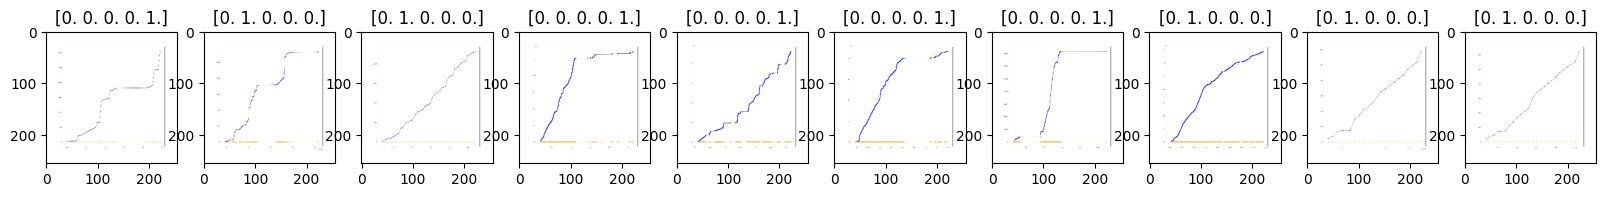

In [28]:
fig, ax = plt.subplots(ncols=10, figsize= (20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [29]:
#Preprocessing data

In [30]:
scaled = batch[0]/255

In [31]:
scaled.max()

1.0

In [32]:
data = data.map(lambda x,y: (x/255, y)) #il y a plusieurs moyens de le faire

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [33]:
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch= scaled_iterator.next()

In [35]:
batch[0].max()

1.0

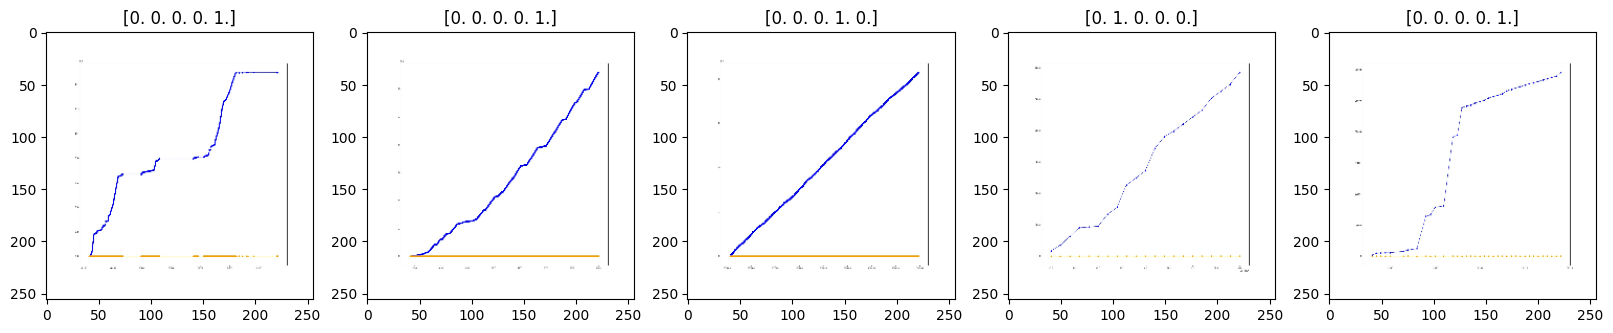

In [36]:
fig, ax = plt.subplots(ncols=5, figsize= (20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [37]:
#Split Data

In [38]:
len(data)

28

In [39]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+0
test_size = int(len(data)*.1)+1

In [40]:
train_size+val_size+test_size

27

In [41]:
train = data.take(train_size)
val =data.skip(train_size).take(val_size)
test= data.skip(train_size + val_size).take(test_size)

In [42]:
len(test)

3

In [43]:
#modeling

In [44]:
#Deep learning model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #Adding a convultion layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D()) #

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(labels_correspondance), activation='sigmoid'))


In [48]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [50]:
#Train

In [51]:
logdir = 'logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs =20, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/20
19/19 [==============================] - 21s 979ms/step - loss: 0.4256 - accuracy: 0.4638 - val_loss: 0.3827 - val_accuracy: 0.4750
Epoch 2/20
19/19 [==============================] - 20s 986ms/step - loss: 0.3729 - accuracy: 0.4984 - val_loss: 0.3614 - val_accuracy: 0.6187
Epoch 3/20
19/19 [==============================] - 22s 1s/step - loss: 0.3447 - accuracy: 0.5822 - val_loss: 0.3288 - val_accuracy: 0.6625
Epoch 4/20
19/19 [==============================] - 22s 1s/step - loss: 0.3090 - accuracy: 0.6447 - val_loss: 0.3000 - val_accuracy: 0.6875
Epoch 5/20
19/19 [==============================] - 21s 1s/step - loss: 0.2812 - accuracy: 0.6924 - val_loss: 0.2826 - val_accuracy: 0.6812
Epoch 6/20
19/19 [==============================] - 20s 1s/step - loss: 0.2631 - accuracy: 0.6924 - val_loss: 0.2889 - val_accuracy: 0.6875
Epoch 7/20
19/19 [==============================] - 23s 1s/step - loss: 0.2201 - accuracy: 0.7730 - val_loss: 0.2555 - val_accuracy: 0.7750
Epoch 8/20
19/

In [54]:
hist.history

{'loss': [0.42557820677757263,
  0.3728927969932556,
  0.3447133004665375,
  0.3090153932571411,
  0.2812243103981018,
  0.2630835175514221,
  0.2200816124677658,
  0.19850409030914307,
  0.16282333433628082,
  0.13171541690826416,
  0.1032542735338211,
  0.1099419966340065,
  0.06971126049757004,
  0.05979229137301445,
  0.0691138282418251,
  0.04215340316295624,
  0.03834344819188118,
  0.0280288215726614,
  0.03671056032180786,
  0.02876058965921402],
 'accuracy': [0.4638157784938812,
  0.49835526943206787,
  0.5822368264198303,
  0.6447368264198303,
  0.6924341917037964,
  0.6924341917037964,
  0.7730262875556946,
  0.7993420958518982,
  0.8503289222717285,
  0.8799341917037964,
  0.9144737124443054,
  0.8947368264198303,
  0.9424341917037964,
  0.9572368264198303,
  0.9424341917037964,
  0.9802631735801697,
  0.9835526347160339,
  0.9851973652839661,
  0.9786184430122375,
  0.9901315569877625],
 'val_loss': [0.3826576769351959,
  0.36137041449546814,
  0.32881173491477966,
  0.300

In [55]:
#Perfomance

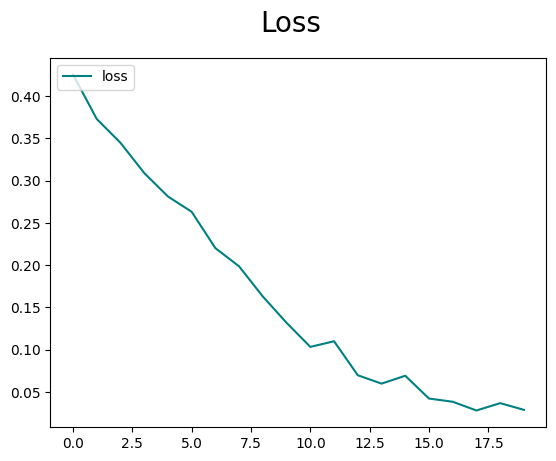

In [56]:
fig =plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='loss')
#plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

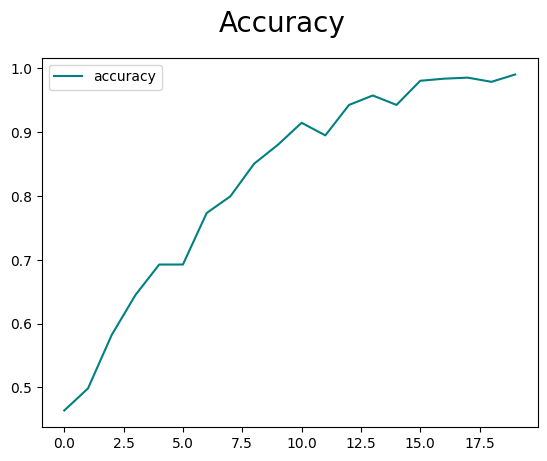

In [57]:
fig =plt.figure()
plt.plot(hist.history['accuracy'], color ='teal', label ='accuracy')
#plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

In [58]:
#Evaluate Performance

In [59]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [60]:
pre = Precision()
re =Recall()
acc = BinaryAccuracy()

In [61]:
for batch in test.as_numpy_iterator():
    x, y = batch 
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 207ms/step


In [62]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8947368, shape=(), dtype=float32) tf.Tensor(0.8854167, shape=(), dtype=float32) tf.Tensor(0.95625, shape=(), dtype=float32)


In [63]:
#Test
import cv2

In [64]:
type(img)

numpy.ndarray

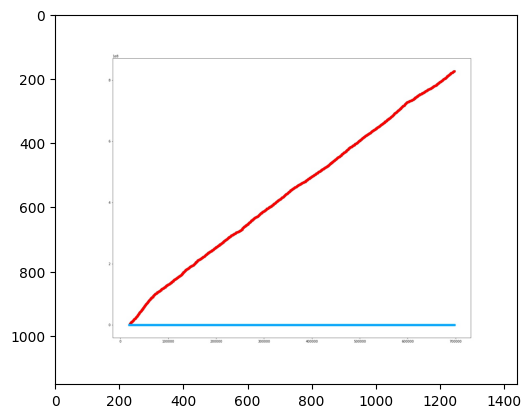

In [65]:
test_img = os.path.join("dataset_images", 'twitch', "20221117_113554_25.png")
img = cv2.imread(test_img)
plt.imshow(img)
plt.show()

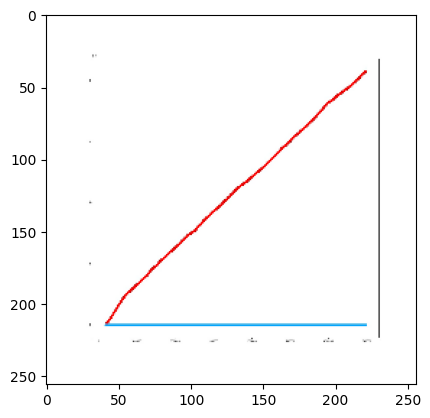

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 25

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 100ms/step


In [69]:
yhat #RQ MALO# la tu devrais avoir une sortie de type [0.816,0.154,0.260], chaque valeur correspond à la probabilité que ce soit telle ou telle classe
# Afin d'afficher la classe il faut donc appliquer la fonction argmax

array([[6.4170366e-05, 8.8428342e-01, 2.8814908e-05, 2.8605745e-04,
        4.5441449e-01]], dtype=float32)

In [70]:
print(tf.math.argmax(yhat[0]))
pred = labels_correspondance[tf.math.argmax(yhat[0])]
print(f"predicted : {pred}")

tf.Tensor(1, shape=(), dtype=int64)
predicted : noise


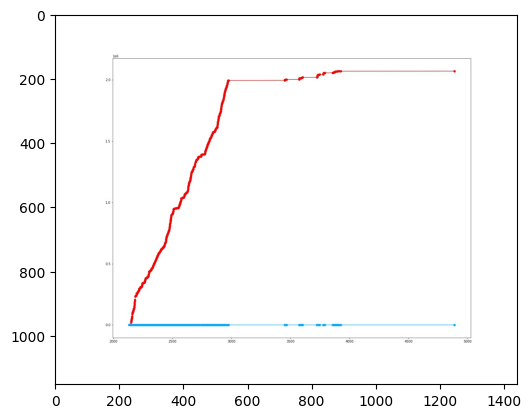

In [71]:
test_img = os.path.join("dataset_images", 'youtube', "20221118_104205_6.png")
img = cv2.imread(test_img)
plt.imshow(img)
plt.show()

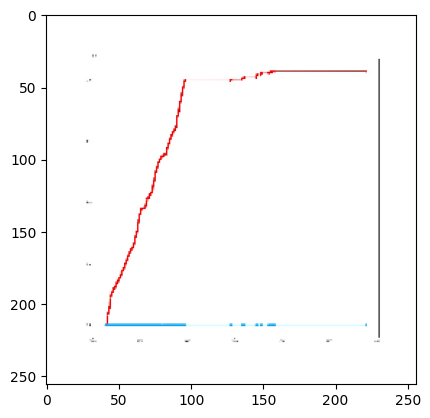

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [74]:
pred = labels_correspondance[tf.math.argmax(yhat[0])]
print(f"predicted : {pred}")

predicted : youtube


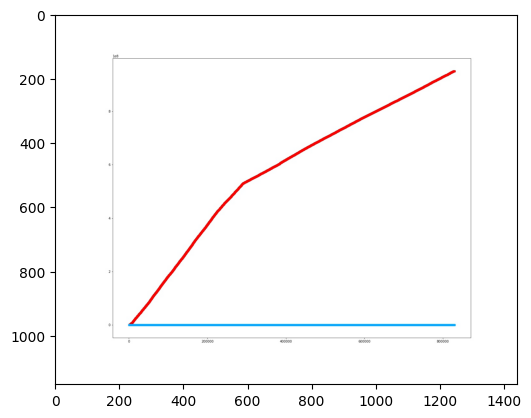

In [75]:
test_img = os.path.join("dataset_images", 'messenger', "20221124_143112_5.png")
img = cv2.imread(test_img)
plt.imshow(img)
plt.show()

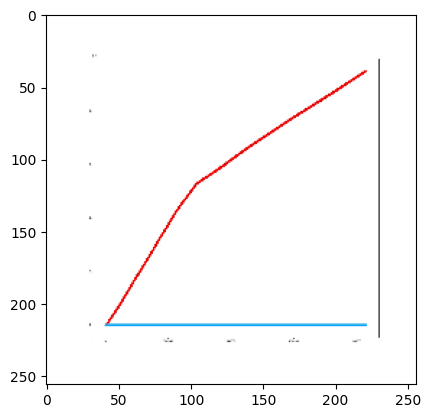

In [76]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [78]:
yhat
pred = labels_correspondance[tf.math.argmax(yhat[0])]
print(f"predicted : {pred}")

predicted : youtube


In [79]:
# mesure efficiency
preds_labels =  model.predict(data)
preds_labels = tf.math.argmax(preds_labels, axis=1)
preds_labels = [labels_correspondance[x] for x in np.array(preds_labels)]

28/28 [==============================] - 8s 244ms/step


In [81]:
images, true_labels = tuple(zip(*data))
true_labels = np.concatenate(true_labels)
true_labels = tf.math.argmax(true_labels, axis=1)
true_labels = [labels_correspondance[x] for x in np.array(true_labels)]

In [83]:
list_set = set(true_labels)
unique_list = (list(list_set))
unique_list

['twitch', 'noise', 'messenger', 'skype', 'youtube']

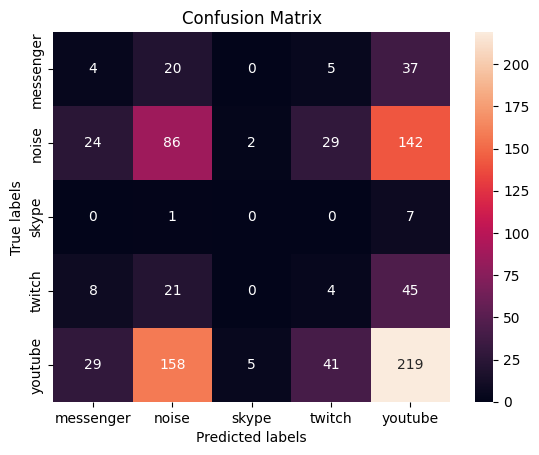

In [84]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt     

cm=confusion_matrix(true_labels,preds_labels )
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_correspondance); ax.yaxis.set_ticklabels(labels_correspondance);